In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Customer_Churn.csv')

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['customerID'].duplicated().sum()

0

In [35]:
def convert(value):
  if value==1:
    return "yes"
  else:
    return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(convert)

In [ ]:
df['SeniorCitizen'].tail(5)

,SeniorCitizen
7038,no
7039,no
7040,no
7041,yes
7042,no


In [ ]:
df['SeniorCitizen'].dtype

dtype('O')

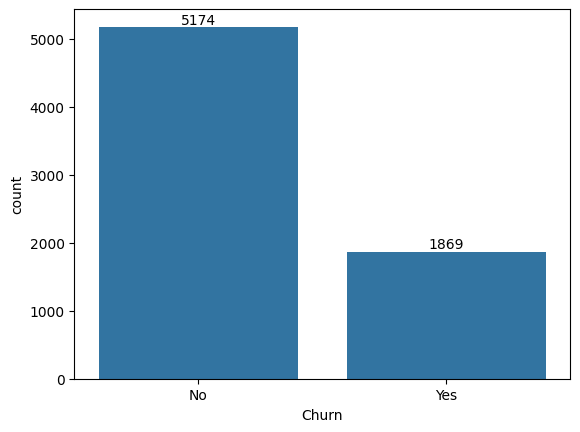

In [ ]:
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.show()

([<matplotlib.patches.Wedge at 0x7a30663f71d0>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.5%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.5%')])

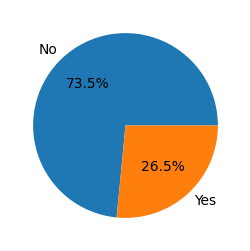

In [ ]:
plt.figure(figsize=(3,3))
group_churn = df.groupby('Churn').agg({'Churn' : 'count'})
plt.pie(group_churn['Churn'], labels=group_churn.index, autopct='%1.1f%%')

[Text(0, 0, '2549'), Text(0, 0, '2625')]

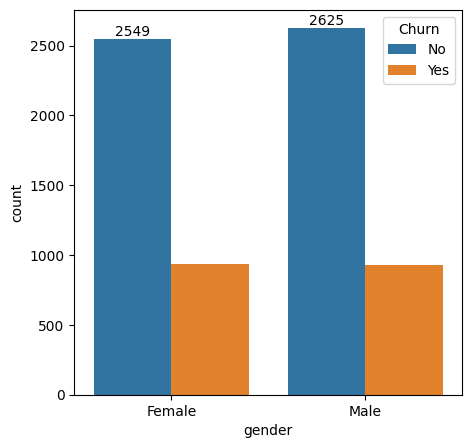

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='gender', data=df, hue='Churn')
ax.bar_label(ax.containers[0])

[Text(0, 0, '4508'), Text(0, 0, '666')]

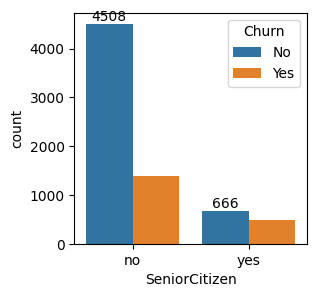

In [ ]:
plt.figure(figsize=(3,3))
ax = sns.countplot(x='SeniorCitizen', data=df, hue='Churn')
ax.bar_label(ax.containers[0])

<Figure size 300x300 with 0 Axes>

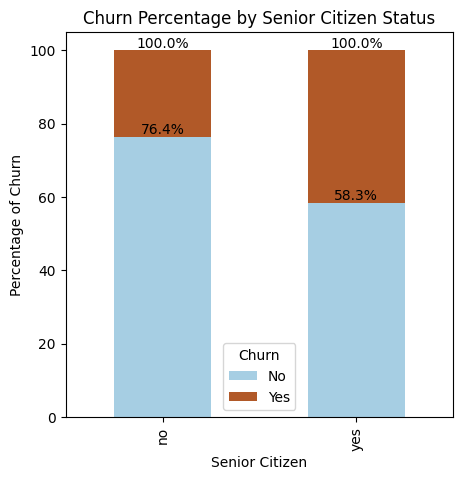

In [ ]:
plt.figure(figsize=(3,3))
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot stacked bar chart
ax = ct.plot(kind='bar', stacked=True, figsize=(5,5), colormap='Paired')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%')

plt.xlabel('Senior Citizen')
plt.ylabel('Percentage of Churn')
plt.title('Churn Percentage by Senior Citizen Status')
plt.legend(title='Churn')
plt.show()

[Text(0, 0, '2771'), Text(0, 0, '2403')]

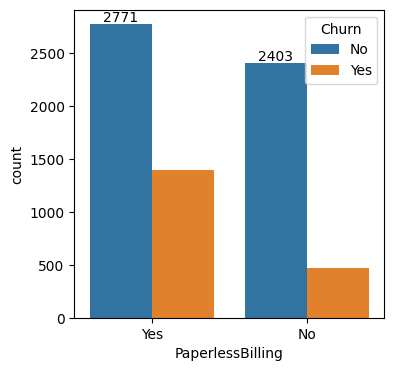

In [6]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='PaperlessBilling', data=df, hue='Churn')
ax.bar_label(ax.containers[0])

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

[Text(0, 0, '1847'), Text(0, 0, '1914'), Text(0, 0, '1413')]

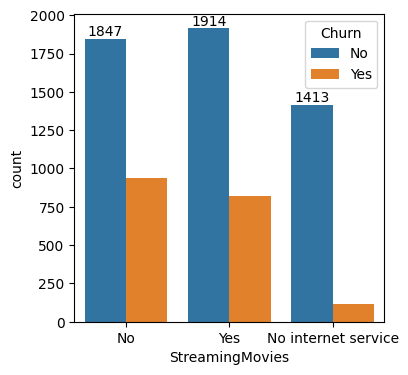

In [8]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='StreamingMovies', data=df, hue='Churn')
ax.bar_label(ax.containers[0])

<Axes: xlabel='tenure', ylabel='Count'>

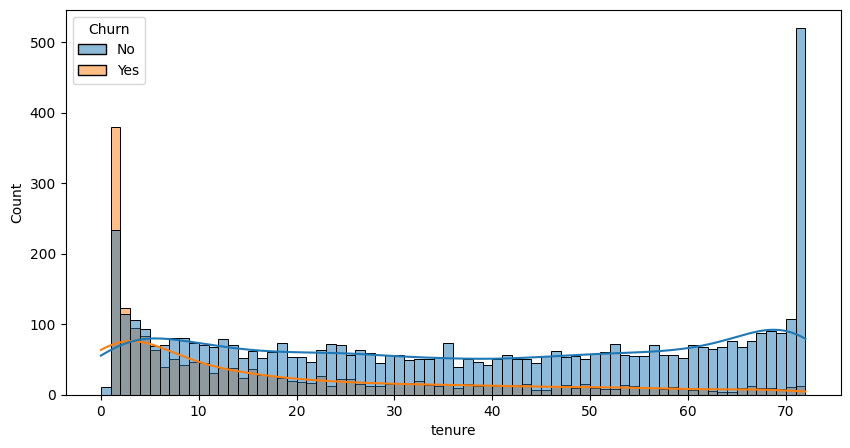

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(x='tenure', data=df, bins=72, hue='Churn', kde=True)

[Text(0, 0, '2733'), Text(0, 0, '2441')]

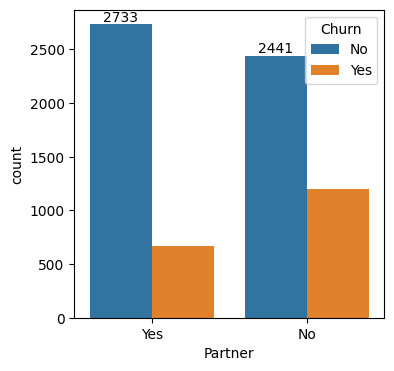

In [15]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Partner', data=df, hue='Churn')
ax.bar_label(ax.containers[0])

[Text(0, 0, '1962'), Text(0, 0, '1799'), Text(0, 0, '1413')]

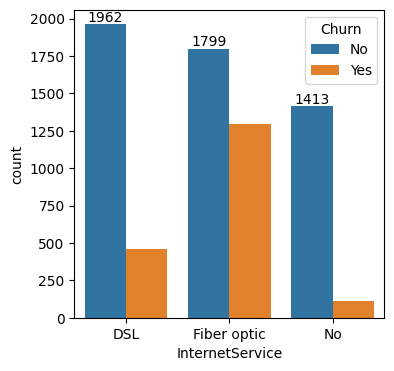

In [16]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='InternetService', data=df, hue='Churn')
ax.bar_label(ax.containers[0])

[Text(0, 0, '2220'), Text(0, 0, '1307'), Text(0, 0, '1647')]

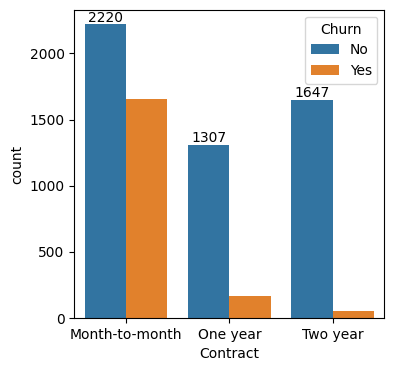

In [18]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Contract', data=df, hue='Churn')
ax.bar_label(ax.containers[0])

In [20]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

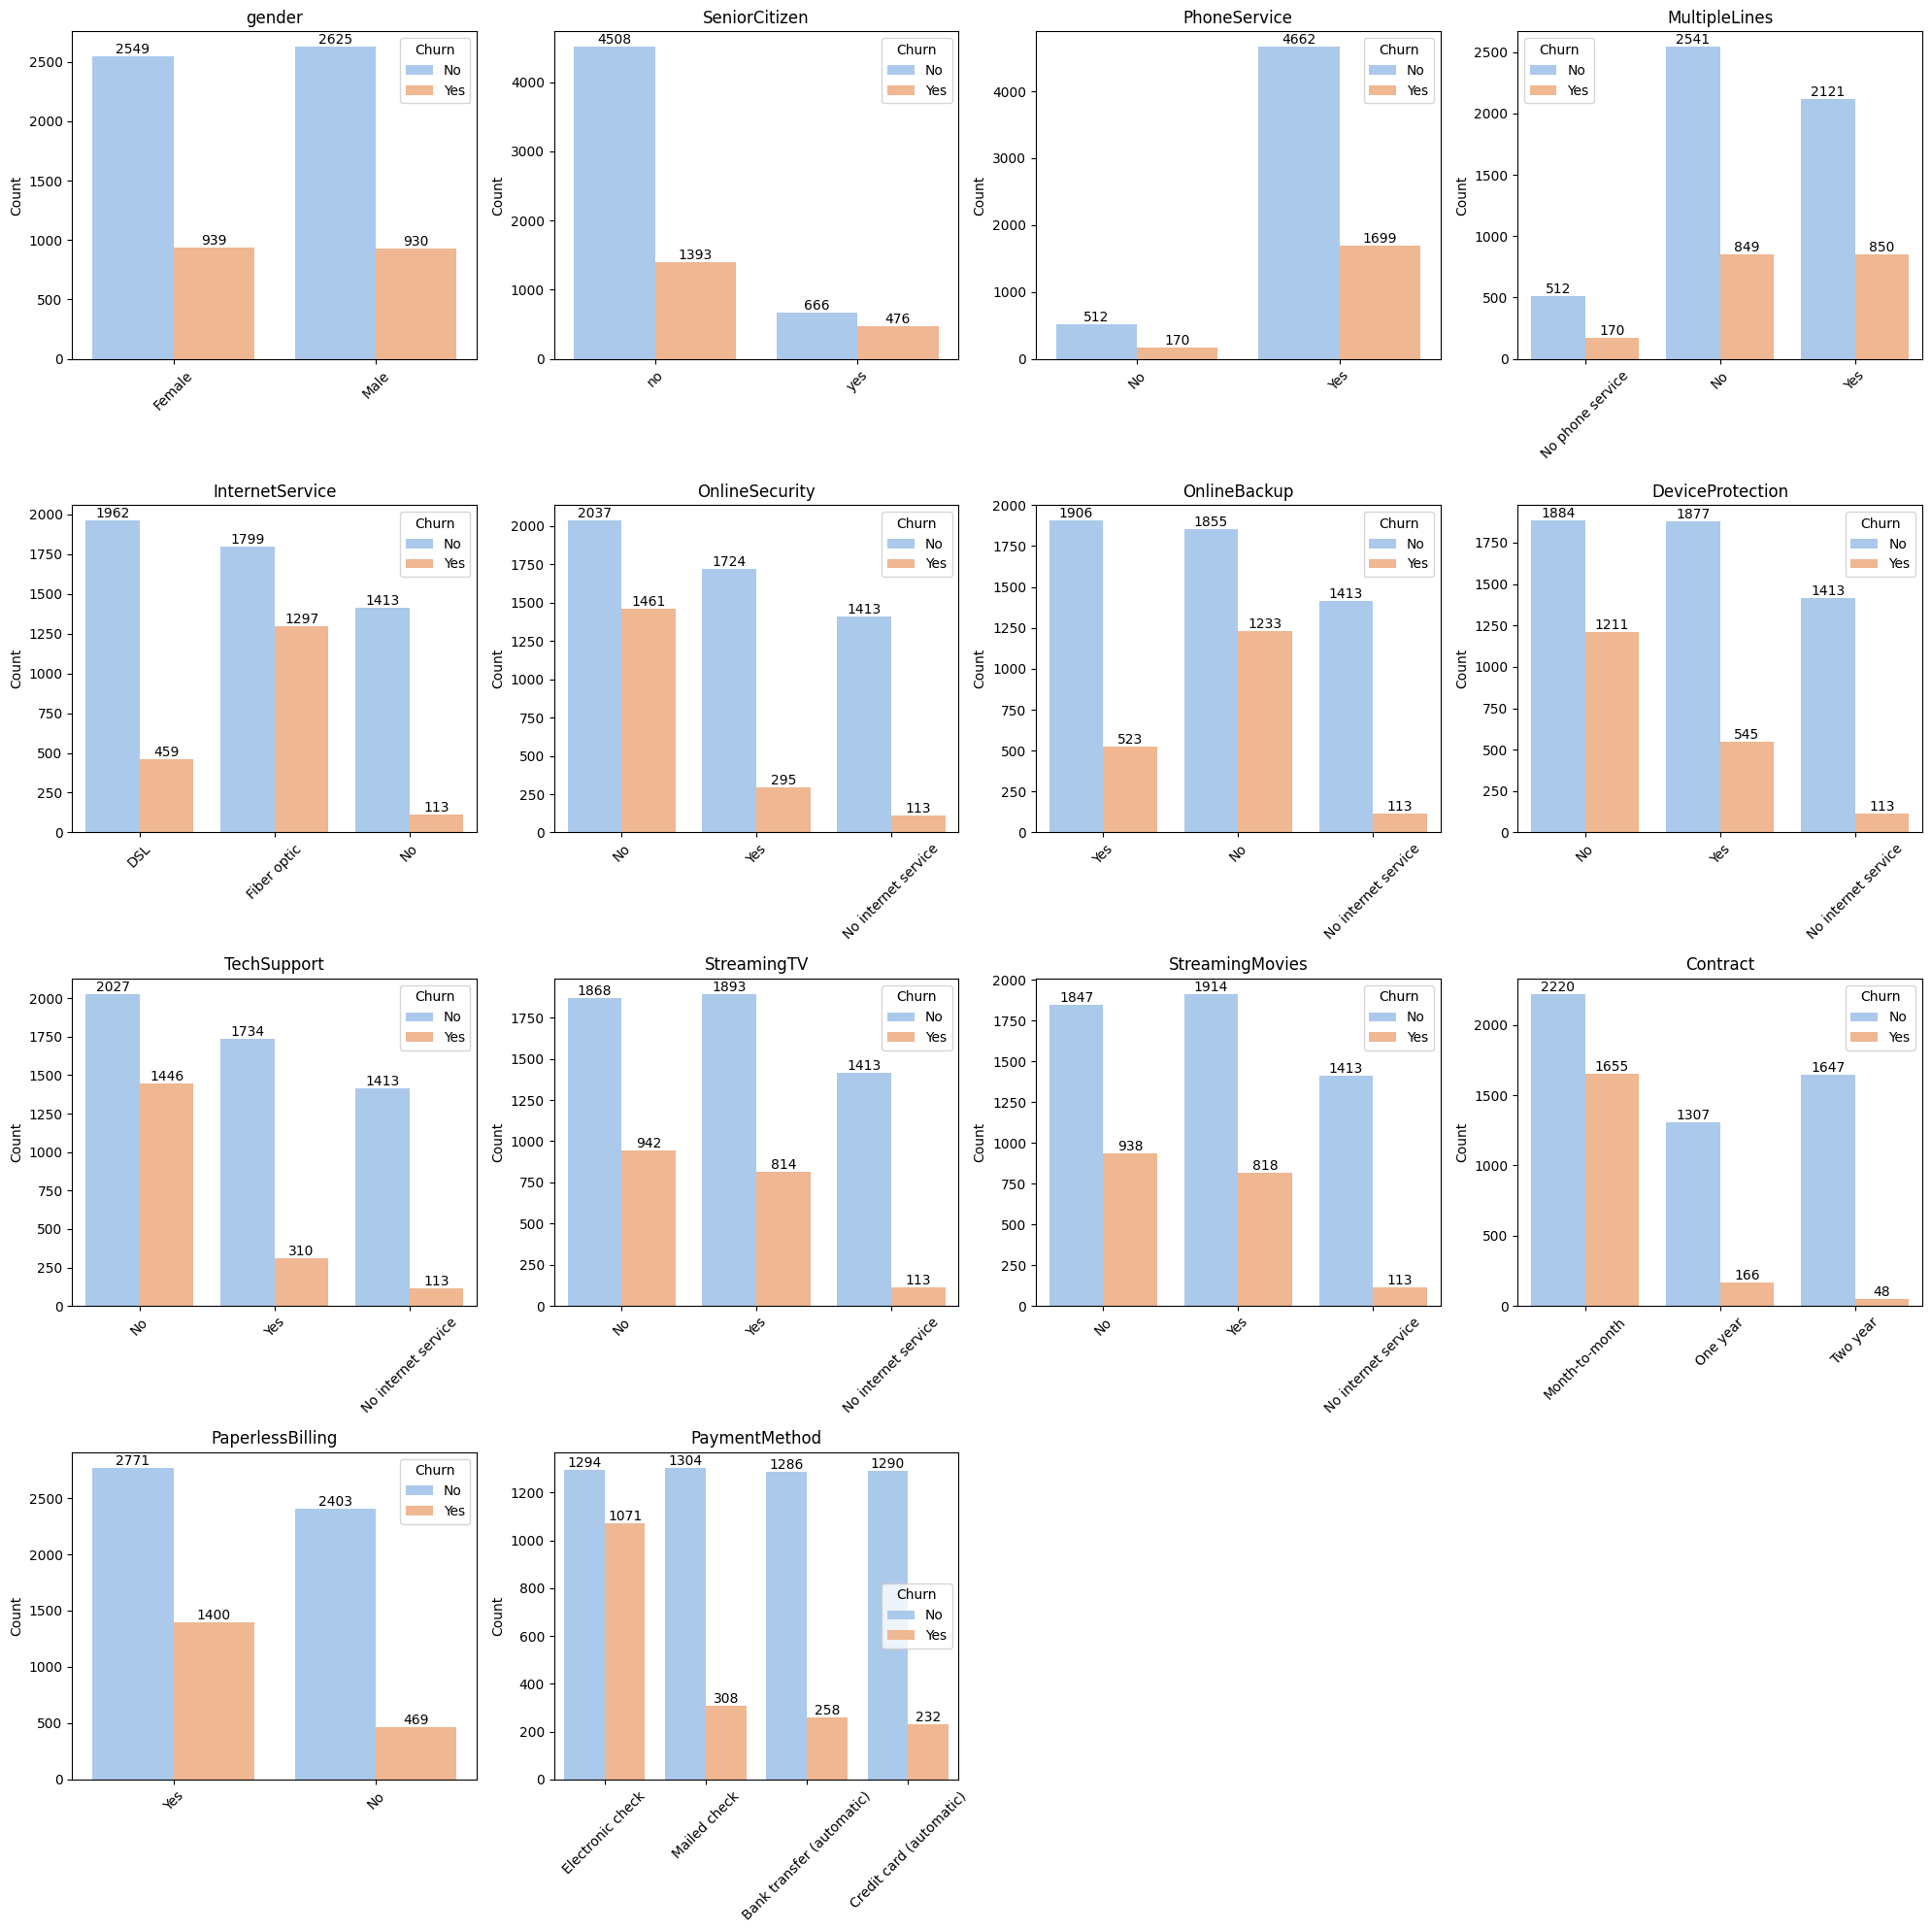

In [37]:
import warnings
warnings.filterwarnings("ignore")

columns = ['gender', 'SeniorCitizen',
           'PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
           'PaperlessBilling', 'PaymentMethod']

# Set the number of graphs per row
num_cols = 4
num_rows = -(-len(columns) // num_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot countplots
for i, col in enumerate(columns):
    ax = sns.countplot(x=df[col], ax=axes[i], palette="pastel", hue=df['Churn'])
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate labels for better visibility

# Hide empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()